# Cinemática inversa de un manipulador RR de 2 GDL

De la cinemática directa del manipulador RR sabemos que:

$$ x = l_2 \cos(\theta_1 + \theta_2) + l_1 \cos\theta_1 $$
$$ y = l_2 \sin(\theta_1 + \theta_2) + l_1 \sin\theta_1 $$

Elevando al cuadrado cada miembro de las ecuaciones anteriores y sumándolas, se tiene:

$$ x^2 + y^2 = \left( l_2 \cos(\theta_1 + \theta_2) + l_1 \cos\theta_1 \right)^2 + 
\left( l_2 \sin(\theta_1 + \theta_2) + l_1 \sin\theta_1 \right)^2 $$

Simplificando términos:

$$ x^2 + y^2 = l_1^2 + l_2^2 + 2 l_1 l_2 \cos\theta_2 $$

$$ \cos\theta_2 = \frac{x^2 + y^2 - l_1^2 - l_2^2  }{2 l_1 l_2} = K $$

Además, sabemos que: 

$$ u = \arctan\left(\frac{\sin u}{\cos u}\right) \qquad y \qquad \sin u = \pm \sqrt{1-\cos^2 u} $$

De tal manera que podemos escribir $\theta_2$ en términos de la función arcotangente, como sigue:

$$ \theta_2 = \arctan\left(\frac{\pm\sqrt{1-K^2}}{K}\right) $$

Para calcular $\theta_1$, de las ecuaciones para $x$ e $y$ podemos expresar el cociente $y/x$ y trabajar con la expresión resultante:

$$ \frac{y}{x} = \frac{l_2 \sin(\theta_1 + \theta_2) + l_1 \sin\theta_1 }{ l_2 \cos(\theta_1 + \theta_2) + l_1 \cos\theta_1 } $$

Factorizando y simplificando los términos para $\cos\theta_1$ y $\sin\theta_1$, podemos escribir:

$$ \theta_1 = \arctan\left( \frac{l_2 y \cos\theta_2 + l_1 y - l_2 x \sin\theta_2}{l_2 x \cos\theta_2 + l_1 x + l_2 y \sin\theta_2} \right) $$

### Ejemplo

Importamos librerías y definimos funciones a utilizar

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy import sin,cos,tan,arcsin,arccos,arctan,arctan2,sqrt,pi
%matplotlib inline

def dh(a,alpha,d,theta):
    M = np.array([[cos(theta),-sin(theta)*cos(alpha),sin(theta)*sin(alpha),a*cos(theta)],
                  [sin(theta),cos(theta)*cos(alpha),-cos(theta)*sin(alpha),a*sin(theta)],
                  [0,sin(alpha),cos(alpha),d],
                  [0,0,0,1]])
    return M

Calculamos la cinemática inversa, y además, graficamos la posición del manipulador, para ello calculamos previamente la cinemática directa del manipulador:

C:\Users\delos\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


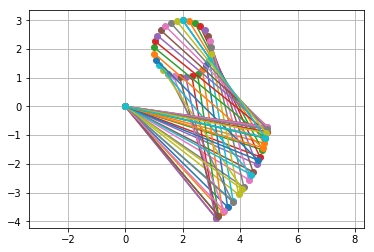

In [2]:
# IK
#t = np.linspace(0,2*np.pi)
T1, T2 = [],[]

for t in np.linspace(0,2*np.pi,30):
    x,y = 2 + np.sin(t), 2 + np.cos(t)
    l1,l2 = 5,5
    K = (x**2 + y**2 - l1**2 - l2**2)/(2*l1*l2)
    t2 = arctan2(sqrt(1-(K**2)), K)
    t1 = arctan2(l2*y*cos(t2) + l1*y - l2*x*sin(t2), l2*x*cos(t2) + l1*x + l2*y*sin(t2))

    # FK
    T1_0 = dh(l1,0,0,t1)
    T2_1 = dh(l2,0,0,t2)
    T2_0 = np.dot(T1_0,T2_1)
    A = np.array([T1_0[0][3],T1_0[1][3]])
    B = np.array([T2_0[0][3],T2_0[1][3]])
    plt.plot([0,A[0],B[0]],[0,A[1],B[1]],"o-")
    plt.grid('on')
    plt.axis('equal');
    T1.append(t1)
    T2.append(t2)




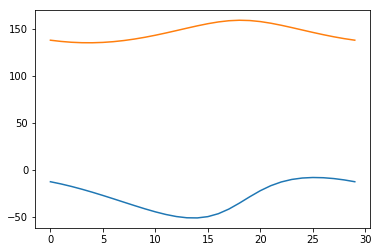

In [3]:
plt.plot([k*180/np.pi for k in T1])
plt.plot([k*180/np.pi for k in T2])

La otra solución se obtiene con el signo (-) de la raíz cuadrada 

C:\Users\delos\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


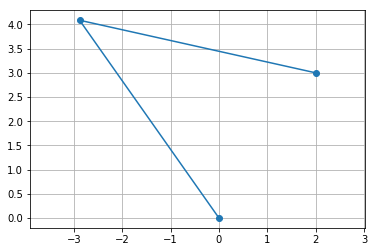

In [4]:
# IK
t2 = arctan2(-sqrt(1-(K**2)), K)
t1 = arctan2(l2*y*cos(t2) + l1*y - l2*x*sin(t2), l2*x*cos(t2) + l1*x + l2*y*sin(t2))

# FK
T1_0 = dh(l1,0,0,t1)
T2_1 = dh(l2,0,0,t2)
T2_0 = np.dot(T1_0,T2_1)
A = np.array([T1_0[0][3],T1_0[1][3]])
B = np.array([T2_0[0][3],T2_0[1][3]])
plt.plot([0,A[0],B[0]],[0,A[1],B[1]],"o-")
plt.grid('on')
plt.axis('equal');

(-21.95561007477473,
 21.81922310880195,
 -21.962429423073363,
 21.962429423073363)

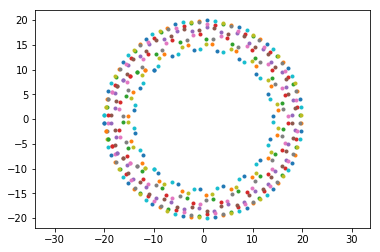

In [10]:
# FK
l1 = 10
l2 = 10
for t1 in np.linspace(-pi,pi,20):
    for t2 in np.linspace(-pi/2,pi/2,20):
        T1_0 = dh(l1,0,0,t1)
        T2_1 = dh(l2,0,0,t2)
        T2_0 = np.dot(T1_0,T2_1)
        A = np.array([T1_0[0][3],T1_0[1][3]])
        B = np.array([T2_0[0][3],T2_0[1][3]])
        plt.plot(B[0],B[1],'.')
plt.axis('equal')

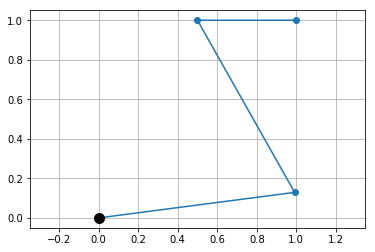

In [9]:
# IK
xq,yq = 1,1
phi = 0
l1,l2,l3 = 1, 1, 0.5
rc = np.array([xq,yq]) - l3*np.array([cos(phi),sin(phi)])
x,y = rc[0],rc[1]
K = (x**2 + y**2 - l1**2 - l2**2)/(2*l1*l2)
t2 = arctan2(sqrt(1-(K**2)), K)
t1 = arctan2(l2*y*cos(t2) + l1*y - l2*x*sin(t2), l2*x*cos(t2) + l1*x + l2*y*sin(t2))

# FK
T1_0 = dh(l1,0,0,t1)
T2_1 = dh(l2,0,0,t2)
#T3_0 = dh(,0,0,)
T3_0 = np.array([[cos(phi),-sin(phi),0,xq],
                 [sin(phi),cos(phi),0,yq],
                 [0,0,1,0],
                 [0,0,0,1]])
T2_0 = np.dot(T1_0,T2_1)
A = np.array([T1_0[0][3],T1_0[1][3]])
B = np.array([T2_0[0][3],T2_0[1][3]])
C = np.array([T3_0[0][3],T3_0[1][3]])
plt.plot([0,A[0],B[0],C[0]],[0,A[1],B[1],C[1]],"o-")
plt.plot([0],[0],'ko',markersize=10)
plt.grid('on')
plt.axis('equal');